In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
from pmdarima import arima

In [4]:
df_1 = pd.read_csv('C:/Users/lenovo/Desktop/gani/ResearchProject/HDFC.csv')
df_1.head()

,Date,Price
0,Apr-13,340.39
1,May-13,349.47
2,Jun-13,334.01
3,Jul-13,304.2
4,Aug-13,296.34


In [25]:
df_1.dtypes

Date     object
Price    object
dtype: object

In [27]:
df_2=df_1

In [28]:
df_2['Price'] = pd.to_numeric(df_2['Price'].str.replace(',', ''), errors='coerce')

In [29]:
from datetime import datetime
df_2['Date'] = pd.to_datetime(df_2['Date'], format='%b-%y').dt.strftime('%Y-%m')

ValueError: time data 'Aug 2019 D' does not match format '%b-%y' (match)

In [30]:
df_2.set_index('Date',inplace=True)

In [31]:
df_2.head()

,Price
Date,
Apr-13,340.39
May-13,349.47
Jun-13,334.01
Jul-13,304.20
Aug-13,296.34


<AxesSubplot:xlabel='Date'>

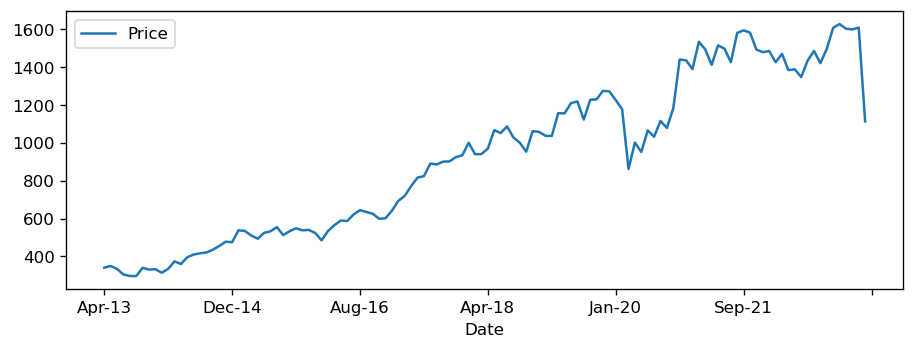

In [33]:
df_2.plot()

In [14]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['Price'])

ADF Test Statistic : -1.2493991282093113
p-value : 0.6519929467376736
#Lags Used : 9
Number of Observations Used : 110
Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary


In [15]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_2.Price,test="adf")

1

In [16]:
df_2['first_diff'] = df_2['Price'].diff().dropna()

In [17]:
df_2.dropna(subset=['first_diff'], inplace=True)

In [18]:
# Define your function with a valid parameter name (e.g., 'close_price')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    result = adfuller(Price)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root indicating it is non-stationary")

# Call the function with your 'Close Price' column as the argument
adfuller_test(df_2['first_diff'])

ADF Test Statistic : -4.928515031918531
p-value : 3.068088693203709e-05
#Lags Used : 8
Number of Observations Used : 110
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary


In [19]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df_2.Price, order=(p, d, q))
        fitted = model.fit()
        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {fitted.aic}")
        print(fitted.summary())
    except:
        continue

ARIMA(p=0, d=0, q=0) - AIC: 1776.18277183033
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  119
Model:                          ARIMA   Log Likelihood                -886.091
Date:                Sun, 19 Nov 2023   AIC                           1776.183
Time:                        18:44:34   BIC                           1781.741
Sample:                             0   HQIC                          1778.440
                                - 119                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        932.0163     38.310     24.328      0.000     856.930    1007.103
sigma2      1.723e+05   3.87e+04      4.455      0.000    9.65e+04    2.48e+05
Ljung-B

In [20]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress warnings to maintain cleanliness (Optional)
warnings.filterwarnings("ignore")

# Your 'train' data should be defined here

# Define the range of values for p, d, q
p_values = range(4)  # 0, 1, 2, 3
d_values = range(4)  # 0, 1, 2, 3
q_values = range(4)  # 0, 1, 2, 3

best_aic = float("inf")
best_order = None

# Iterate through all combinations of p, d, q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df_2.Price, order=(p, d, q))
        fitted = model.fit()
        current_aic = fitted.aic

        print(f"ARIMA(p={p}, d={d}, q={q}) - AIC: {current_aic}")

        # Check if the current model has a lower AIC than the previous best model
        if current_aic < best_aic:
            best_aic = current_aic
            best_order = (p, d, q)

    except:
        continue

if best_order is not None:
    print("\nBest Model:")
    print(f"ARIMA(p={best_order[0]}, d={best_order[1]}, q={best_order[2]}) - AIC: {best_aic}")
    best_model = ARIMA(df_2.Price, order=best_order)
    best_fitted = best_model.fit()
    print(best_fitted.summary())
else:
    print("No valid model found.")


ARIMA(p=0, d=0, q=0) - AIC: 1776.18277183033
ARIMA(p=0, d=0, q=1) - AIC: 1646.051501889348
ARIMA(p=0, d=0, q=2) - AIC: 1557.2212211759665
ARIMA(p=0, d=0, q=3) - AIC: 1523.3212819246824
ARIMA(p=0, d=1, q=0) - AIC: 1365.0642887338186
ARIMA(p=0, d=1, q=1) - AIC: 1365.5227899884983
ARIMA(p=0, d=1, q=2) - AIC: 1367.1503884444824
ARIMA(p=0, d=1, q=3) - AIC: 1368.6264679416338
ARIMA(p=0, d=2, q=0) - AIC: 1426.582739806338
ARIMA(p=0, d=2, q=1) - AIC: 1360.449562024457
ARIMA(p=0, d=2, q=2) - AIC: 1360.686478984073
ARIMA(p=0, d=2, q=3) - AIC: 1362.430558289878
ARIMA(p=0, d=3, q=0) - AIC: 1532.849923155509
ARIMA(p=0, d=3, q=1) - AIC: 1421.9436172150229
ARIMA(p=0, d=3, q=2) - AIC: 1360.9565124549492
ARIMA(p=0, d=3, q=3) - AIC: 1361.6489883970949
ARIMA(p=1, d=0, q=0) - AIC: 1382.9891482262108
ARIMA(p=1, d=0, q=1) - AIC: 1383.786830254568
ARIMA(p=1, d=0, q=2) - AIC: 1385.2584369570432
ARIMA(p=1, d=0, q=3) - AIC: 1386.4541261018182
ARIMA(p=1, d=1, q=0) - AIC: 1365.3847789271515
ARIMA(p=1, d=1, q=1) -

#PLOTTING

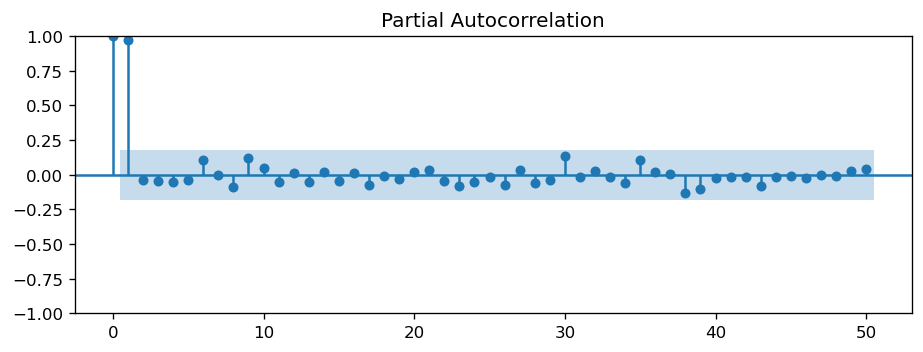

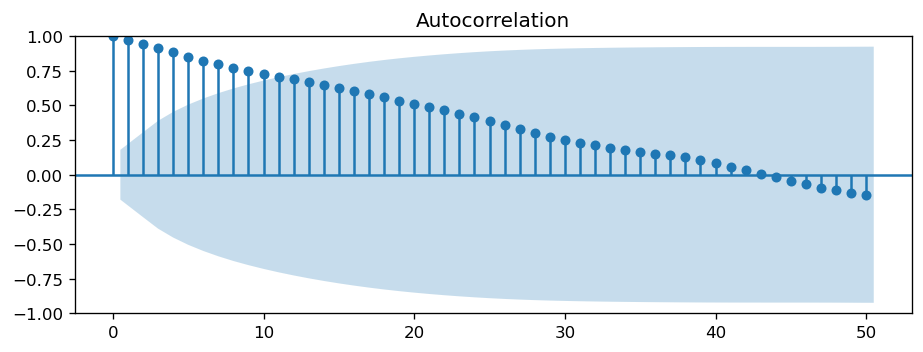

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df_2.first_diff); axes[0].set_title('first_diff')
#axes[1].set(ylim=(0,5))
plot_pacf(df_2.Price.dropna(),lags=50)#, ax=axes[1])
plot_acf(df_2.Price.dropna(),lags =50)

plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

model = ARIMA(df_2['Price'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  120
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -677.781
Date:                Sun, 19 Nov 2023   AIC                           1365.563
Time:                        19:22:44   BIC                           1379.458
Sample:                             0   HQIC                          1371.205
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4907      0.069     -7.112      0.000      -0.626      -0.355
ar.L2         -0.9148      0.074    -12.288      0.000      -1.061      -0.769
ma.L1          0.2918      0.313      0.933      0.3

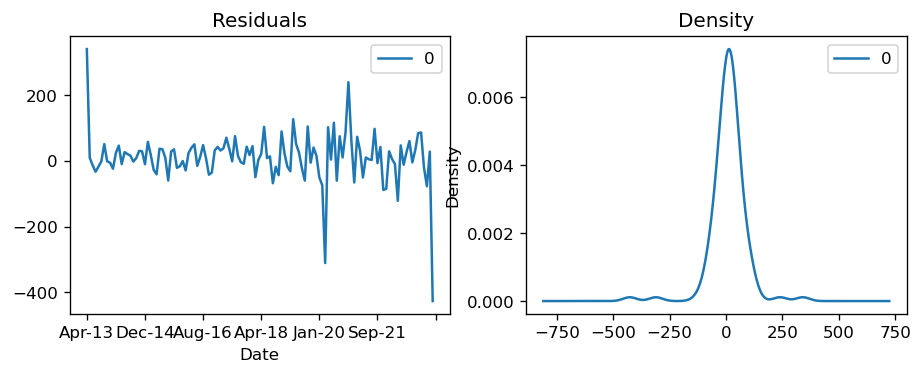

In [35]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

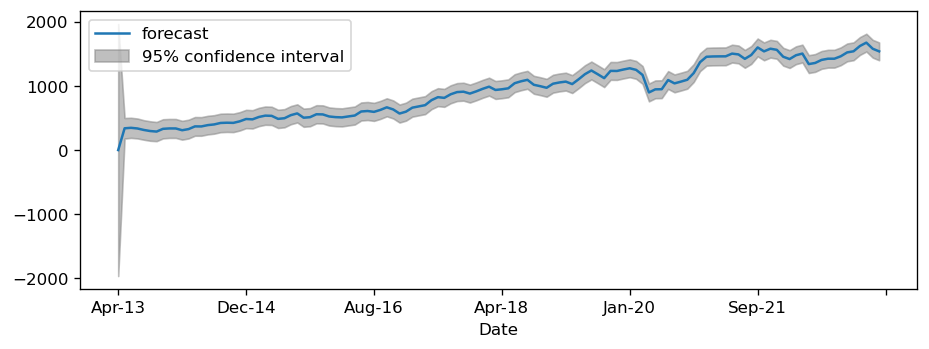

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pandas as pd
# Actual vs Fitted
#model_fit.plot_predict(dynamic=False)
plot_predict(model_fit,dynamic=False)
plt.show()

In [38]:
from pmdarima import auto_arima
#try diff order and assign a score ,Goal to minimise AIC (p,d,q)
stepwise_fit = auto_arima(df_2['Price'],trace =True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1376.789, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1376.584, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1376.670, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1375.625, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1378.584, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.956 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -686.813
Date:                Sun, 19 Nov 2023   AIC                           1375.625
Time:                        19:29:45   BIC                           1378.404
Sample:                             0   HQIC                          1376.754
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6034.1600    268.719     22.455      0.000    5507.481    6560.839
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):              1375.89
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):              24.14   Skew:                            -2.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

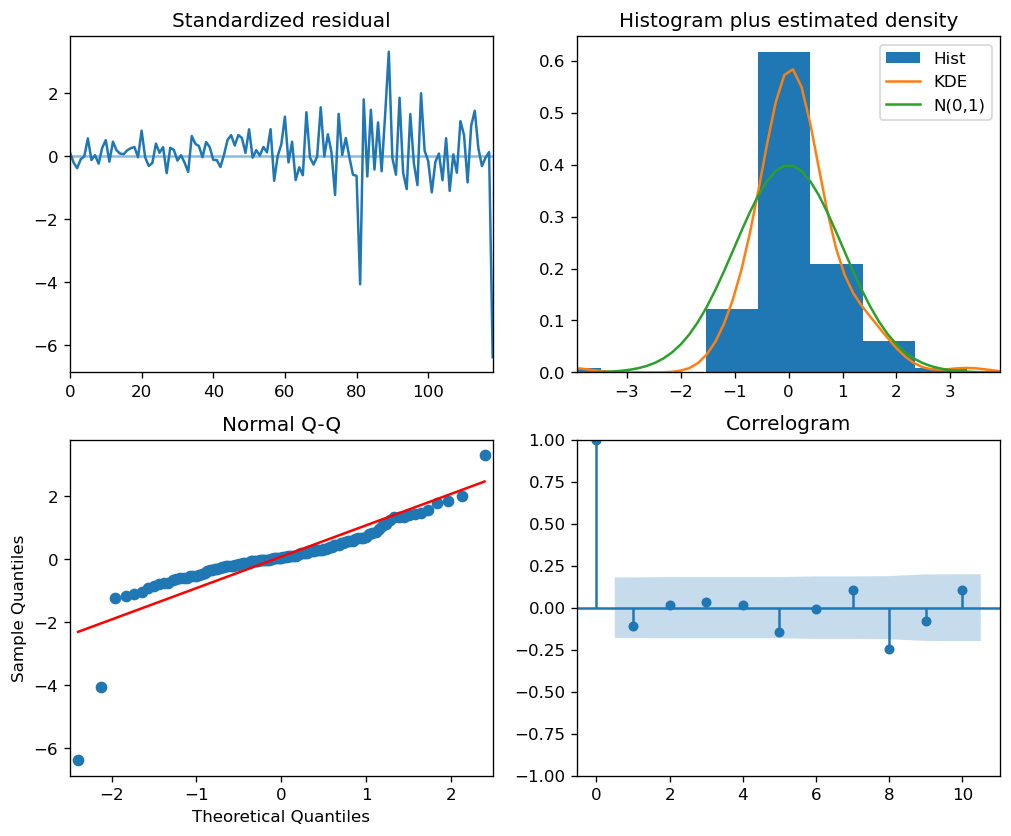

In [39]:
stepwise_fit.plot_diagnostics(figsize=(10,8))
plt.show()